In [10]:
using RxInfer, Distributions, Random

# Random number generator for reproducibility
rng            = MersenneTwister(42)
# Number of coin flips (observations)
n_observations = 100
# The bias of a coin used in the demonstration
coin_bias      = 0.75
# We assume that the outcome of each coin flip is
# distributed as the `Bernoulli` distrinution
distribution   = Bernoulli(coin_bias)
# Simulated coin flips
dataset        = rand(rng, distribution, n_observations)

100-element Vector{Bool}:
 1
 1
 1
 1
 0
 0
 1
 1
 0
 1
 ⋮
 0
 0
 1
 0
 1
 0
 1
 1
 0

In [11]:
@model function coin_model(y, a, b)
    θ  ~ Beta(a, b)
    y .~ Bernoulli(θ)
end

In [12]:
result = infer(
    model = coin_model(a = 2.0, b = 7.0),
    data  = (y = dataset, )
)
θestimated = result.posteriors[:θ]

Beta{Float64}(α=81.0, β=28.0)

In [13]:
println("Real bias is ", coin_bias)
println("Estimated bias is ", mean(θestimated))
println("Standard deviation ", std(θestimated))

Real bias is 0.75
Estimated bias is 0.7431192660550459
Standard deviation 0.04165802579803319


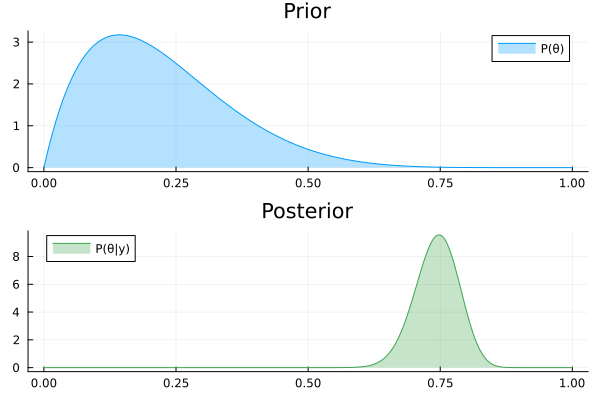

In [14]:
using Plots

rθ = range(0, 1, length = 1000)

p1 = plot(rθ, (x) -> pdf(Beta(2.0, 7.0), x), title="Prior", fillalpha=0.3, fillrange = 0, label="P(θ)", c=1,)
p2 = plot(rθ, (x) -> pdf(θestimated, x), title="Posterior", fillalpha=0.3, fillrange = 0, label="P(θ|y)", c=3)

plot(p1, p2, layout = @layout([ a; b ]))